In [382]:
#import some packages you will be using
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [383]:
train_df = pd.read_csv('AMES_TRAIN.csv')
test_df = pd.read_csv('AMES_TEST_SFAM.csv')

In [384]:
train_df.columns = [col.lower() for col in train_df.columns]
test_df.columns = [col.lower() for col in test_df.columns]

In [385]:
print("-------------------------------------------------------")
print("            Summary of Train Data set                  ")
print("-------------------------------------------------------")
print("Object type: ", type(train_df))
print("")

-------------------------------------------------------
            Summary of Train Data set                  
-------------------------------------------------------
Object type:  <class 'pandas.core.frame.DataFrame'>



In [386]:
# show variable names
print(train_df.columns)
print("")

Index(['﻿subclass', 'zoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodel', 'roofstyle',
       'roofmat', 'exterior1', 'exterior2', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'woodde

In [387]:
# show number of observations in the DataFrame
print('Number of observations: ', len(train_df))

Number of observations:  2039


In [388]:
# show descriptive statistics
print(train_df.describe())

         ﻿subclass  lotfrontage        lotarea  overallqual  overallcond  \
count  2039.000000  1714.000000    2039.000000  2039.000000  2039.000000   
mean     56.586562    68.581680   10062.990191     6.077979     5.585091   
std      41.876919    23.056608    8125.002560     1.407362     1.107337   
min      20.000000    21.000000    1477.000000     1.000000     1.000000   
25%      20.000000          NaN    7365.000000     5.000000     5.000000   
50%      50.000000          NaN    9320.000000     6.000000     5.000000   
75%      70.000000          NaN   11424.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         yearbuilt  yearremodel   masvnrarea   bsmtfinsf1   bsmtfinsf2  \
count  2039.000000  2039.000000  2024.000000  2038.000000  2038.000000   
mean   1970.817558  1984.100539   100.546443   442.681060    49.145240   
std      30.456005    21.101772   179.386037   457.705442   166.686338   
min    1872.000000 

In [389]:
# show a portion of the beginning of the DataFrame
print(train_df.head())

   ﻿subclass zoning  lotfrontage  lotarea street alley lotshape landcontour  \
0         20     RL          NaN    11838   Pave   NaN      Reg         Lvl   
1         60     RL         70.0     8304   Pave   NaN      IR1         Lvl   
2         45     RM         58.0     6380   Pave   NaN      Reg         Lvl   
3         60     RL          NaN    14803   Pave   NaN      IR1         Lvl   
4         20     RL         91.0    11375   Pave   NaN      Reg         Lvl   

  utilities lotconfig  ...   poolqc  fence miscfeature miscval mosold yrsold  \
0    AllPub    Inside  ...      NaN    NaN         NaN       0      6   2009   
1    AllPub    Inside  ...      NaN  GdPrv         NaN       0      7   2006   
2    AllPub    Inside  ...      NaN    NaN         NaN       0      8   2006   
3    AllPub   CulDSac  ...      NaN   GdWo         NaN       0      6   2006   
4    AllPub    Inside  ...      NaN    NaN         NaN       0     10   2007   

   saletype  salecondition  saleprice  index

In [390]:
#watch your record count and fix records with missing NaN data
print(train_df.shape)
train_df.isnull().sum()
train_df[train_df == 0].count()

(2039, 81)


﻿subclass           0
zoning              0
lotfrontage         0
lotarea             0
street              0
alley               0
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodel         0
roofstyle           0
roofmat             0
exterior1           0
exterior2           0
masvnrtype          0
masvnrarea       1232
exterqual           0
extercond           0
foundation          0
bsmtqual            0
                 ... 
kitchenabvgr        3
kitchenqual         0
totrmsabvgrd        0
functional          0
fireplaces       1012
fireplacequ         0
garagetype          0
garageyrblt         0
garagefinish        0
garagecars        118
garagearea        118
garagequal          0
garagecond          0
paveddrive          0
wooddecksf

In [391]:
# descriptive statistics summary for SalePrice
train_df['saleprice'].describe()

count      2039.000000
mean     179368.827857
std       78982.943661
min       34900.000000
25%      128500.000000
50%      160000.000000
75%      210125.000000
max      745000.000000
Name: saleprice, dtype: float64

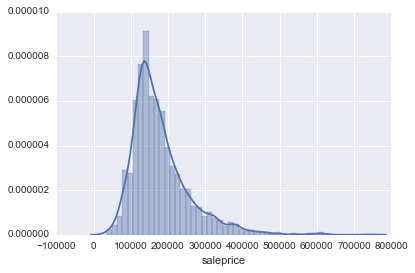

In [392]:
# From above minimum price is greater than zero. Let's look at the data distribution for the SalePrice
#histogram
sns.distplot(train_df['saleprice']);

In [393]:
# From the histogram, SalePrice data Deviate from the normal distribution and has appreciable positive skewness. 
# And it also Show peakedness.

In [394]:
#skewness and kurtosis
print("Skewness: %f" % train_df['saleprice'].skew())
print("Kurtosis: %f" % train_df['saleprice'].kurt())

Skewness: 1.767097
Kurtosis: 5.170580


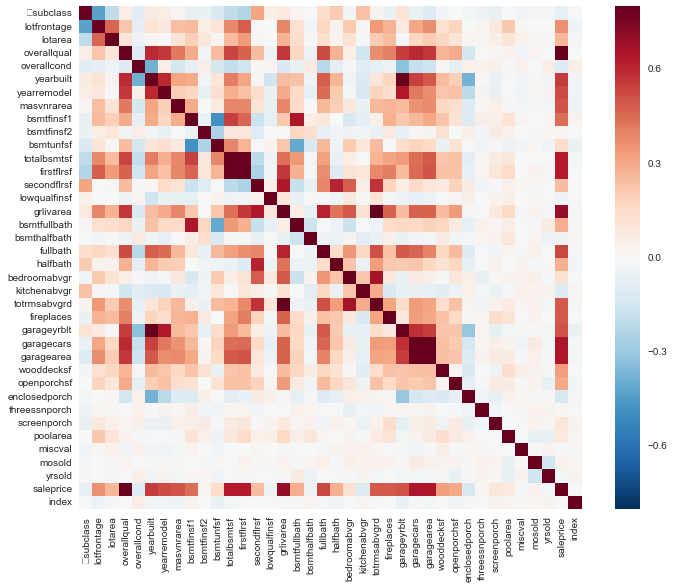

In [395]:
#correlation matrix
corr_matrix = train_df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_matrix, vmax = .8, square = True)

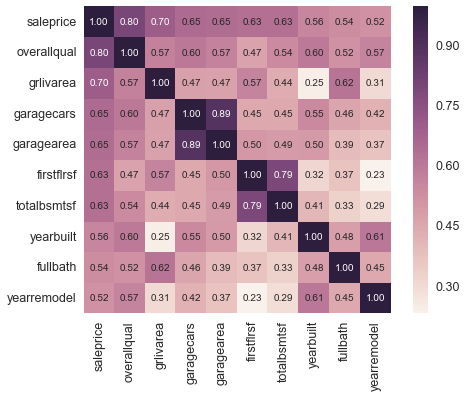

In [396]:
# Let's zoom in and look at the SalePrice correlation matrix
# Limit the number of variables to 10 in the heatmap
train_df["totalbsmtsf"] = train_df["totalbsmtsf"].fillna(0)
columns = corr_matrix.nlargest(10, 'saleprice')['saleprice'].index
corr_m = np.corrcoef(train_df[columns].values.T)
sns.set(font_scale = 1.25)
heat_map = sns.heatmap(corr_m, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = columns.values, xticklabels = columns.values)
plt.show()

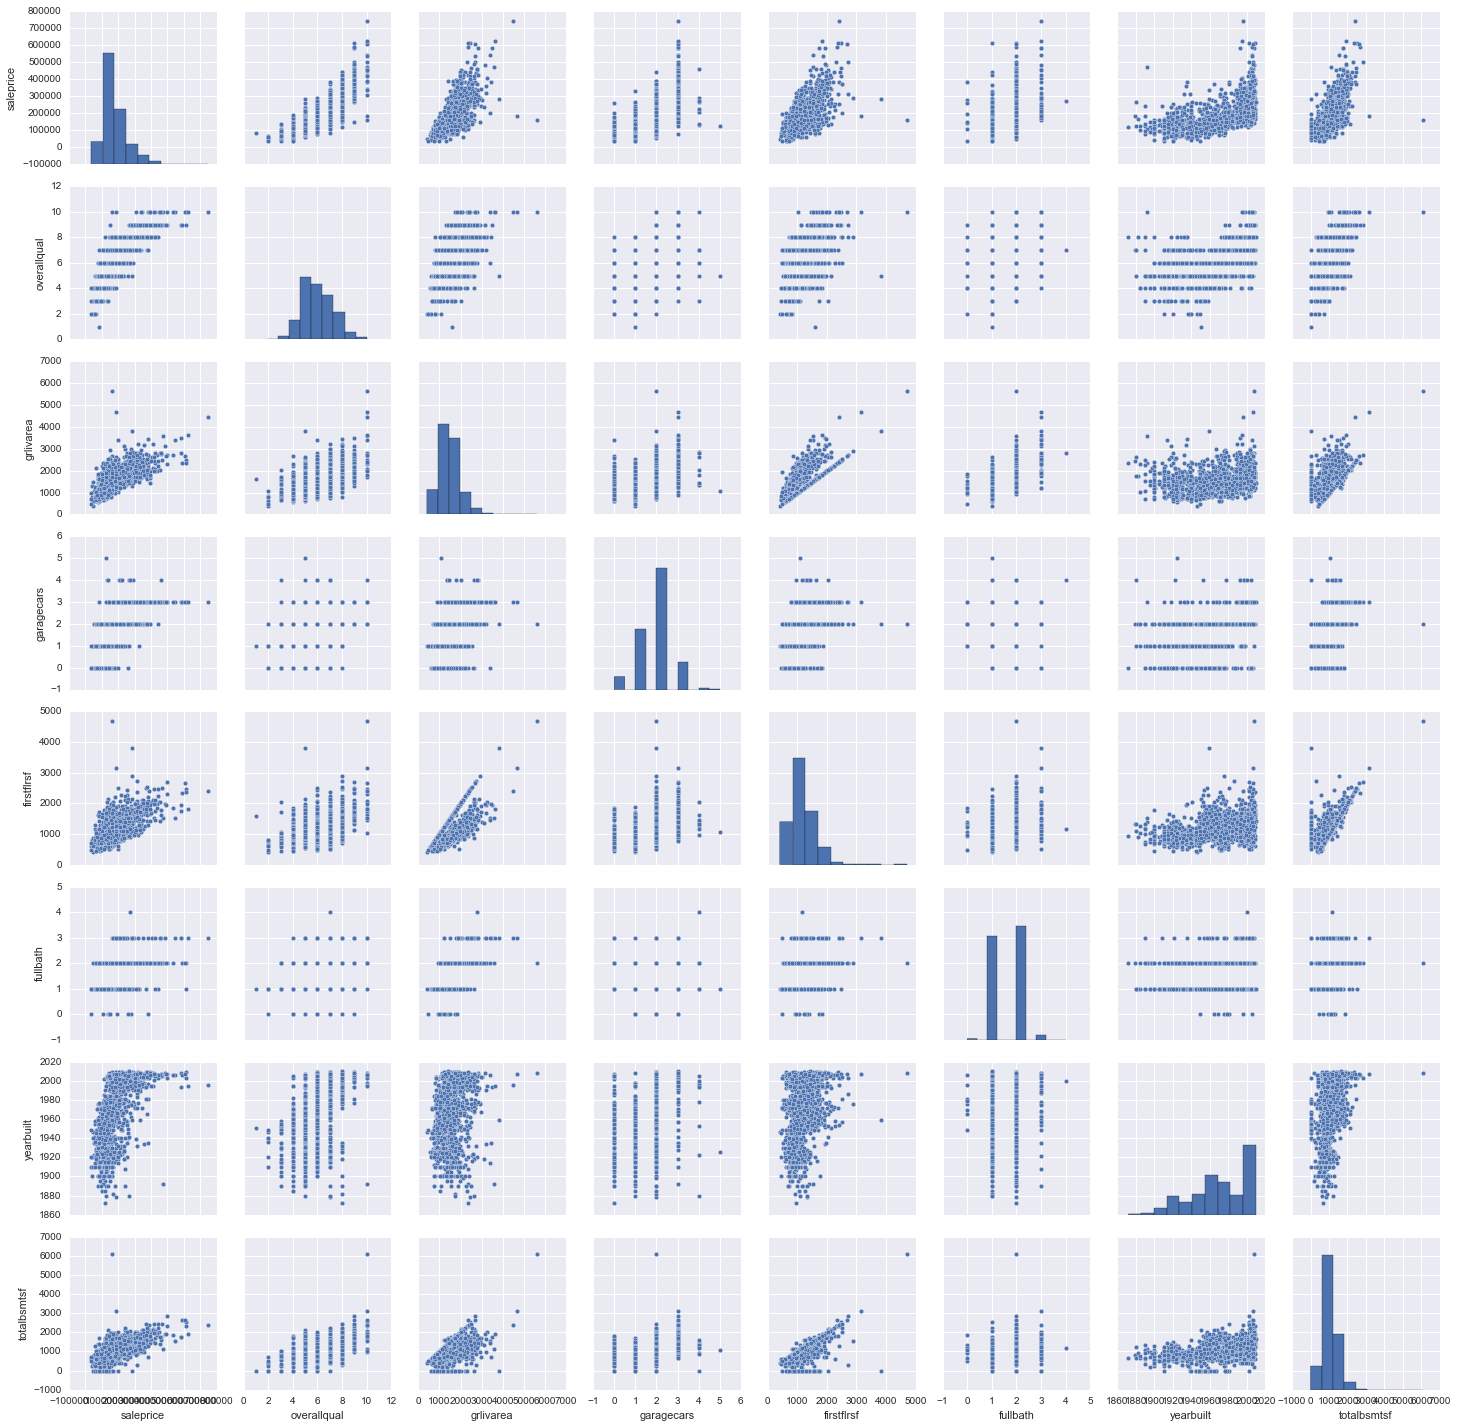

In [397]:
# Scatter plots between 'SalePrice' and correlated variables
sns.set()
cols = ['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'firstflrsf', 'fullbath', 'yearbuilt','totalbsmtsf']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

In [398]:
train_org = train_df.copy()

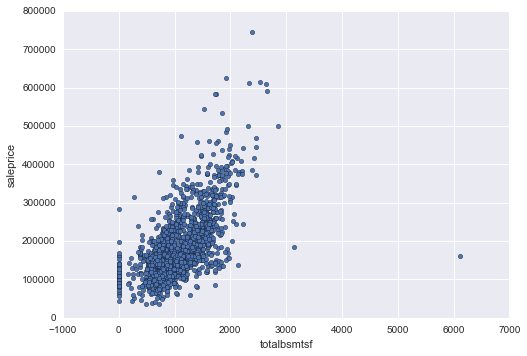

In [399]:
var = 'totalbsmtsf'
data = pd.concat([train_df['saleprice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='saleprice', ylim=(0,800000));

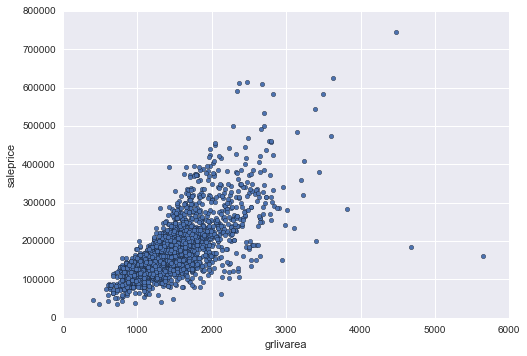

In [400]:
#scatter plot grlivarea/saleprice
var = 'grlivarea'
data = pd.concat([train_df['saleprice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='saleprice', ylim=(0,800000));

In [401]:
#Relationship with categorical features

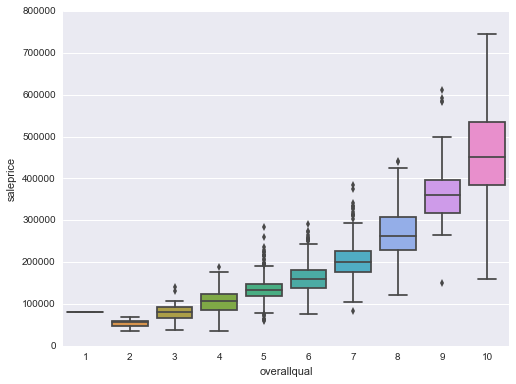

In [402]:
#box plot overallqual/saleprice
var = 'overallqual'
data = pd.concat([train_df['saleprice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);

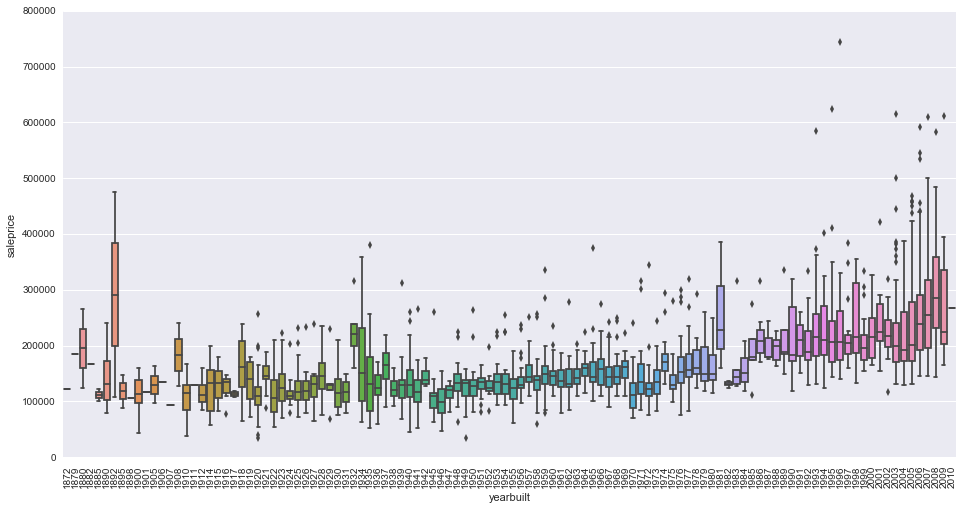

In [403]:
var = 'yearbuilt'
data = pd.concat([train_df['saleprice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [404]:
# Missing data

In [405]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
poolqc,2028,0.994605
miscfeature,1963,0.962727
alley,1893,0.928396
fence,1639,0.803825
fireplacequ,1012,0.496322
lotfrontage,325,0.159392
garagecond,119,0.058362
garageyrblt,119,0.058362
garagefinish,119,0.058362
garagequal,119,0.058362


In [406]:
#dealing with missing data
train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df = train_df.drop(train_df.loc[train_df['electrical'].isnull()].index)
train_df = train_df.drop(train_df.loc[train_df['bsmtunfsf'].isnull()].index)
train_df = train_df.drop(train_df.loc[train_df['bsmtfinsf2'].isnull()].index)
train_df = train_df.drop(train_df.loc[train_df['bsmtfinsf1'].isnull()].index)
train_df.isnull().sum().max()

0

In [407]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_df['saleprice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83009867]
 [-1.8248942 ]
 [-1.79210984]
 [-1.76551765]
 [-1.71486587]
 [-1.70220292]
 [-1.6832085 ]
 [-1.63888819]
 [-1.6135623 ]
 [-1.60723083]]

outer range (high) of the distribution:
[[ 4.50264057]
 [ 4.63210653]
 [ 5.10961356]
 [ 5.12945639]
 [ 5.21919869]
 [ 5.45236151]
 [ 5.47334401]
 [ 5.51567624]
 [ 5.6423057 ]
 [ 7.16185921]]


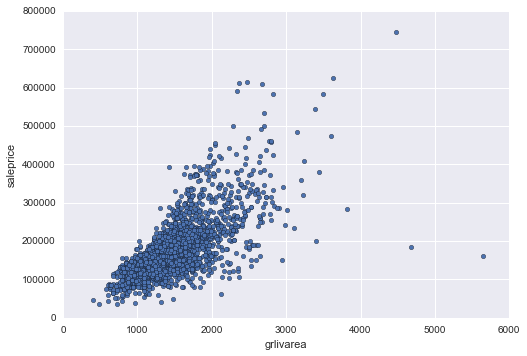

In [408]:
#bivariate analysis saleprice/grlivarea
var = 'grlivarea'
data = pd.concat([train_df['saleprice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='saleprice', ylim=(0,800000));

In [409]:
#deleting points
train_df.sort_values(by = 'grlivarea', ascending = False)[:3]
train_df = train_df.drop(train_df[train_df['saleprice'] == 745000].index)

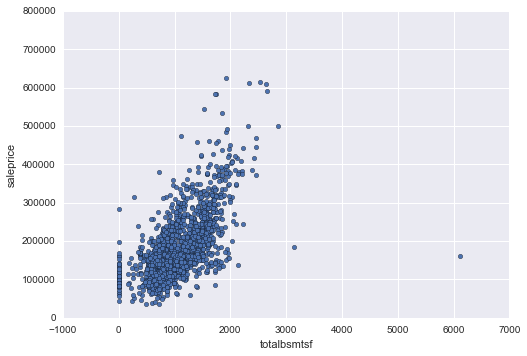

In [410]:
#bivariate analysis saleprice/grlivarea
var = 'totalbsmtsf'
data = pd.concat([train_df['saleprice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='saleprice', ylim=(0,800000));

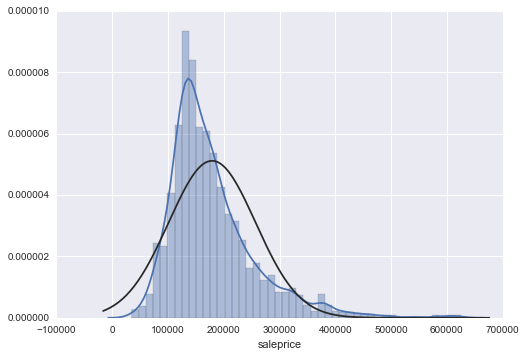

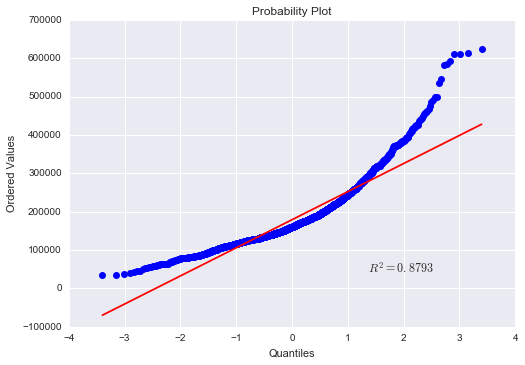

In [411]:

#histogram and normal probability plot
#sns.distplot(train_df['saleprice'], fit='norm');
sns.distplot(train_df['saleprice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['saleprice'], plot=plt)

In [412]:
# Start adding the models
#applying log transformation
train_df['saleprice'] = np.log(train_df['saleprice'])

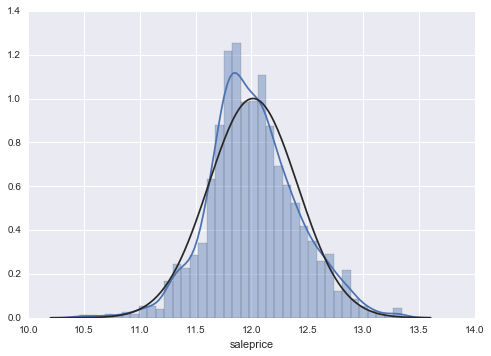

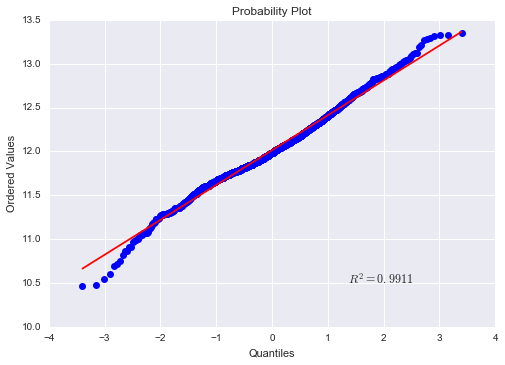

In [413]:
sns.distplot(train_df['saleprice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['saleprice'], plot=plt)

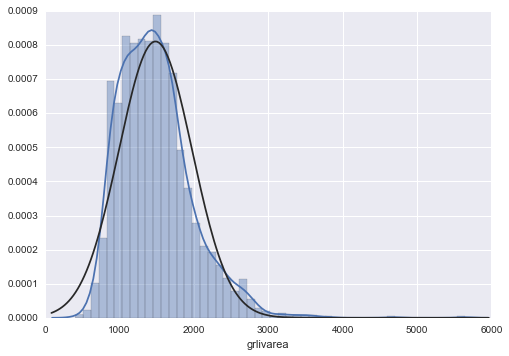

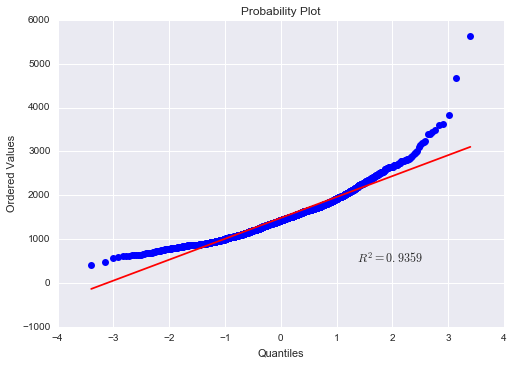

In [414]:
#histogram and normal probability plot
sns.distplot(train_df['grlivarea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['grlivarea'], plot=plt)

In [415]:
#data transformation
train_df['grlivarea'] = np.log(train_df['grlivarea'])

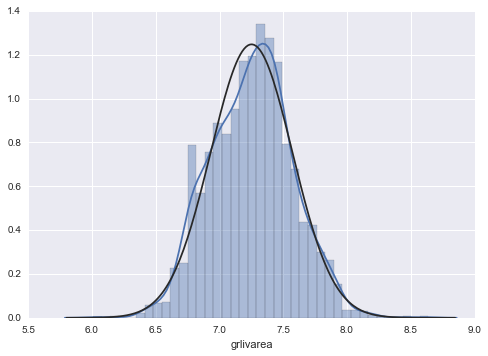

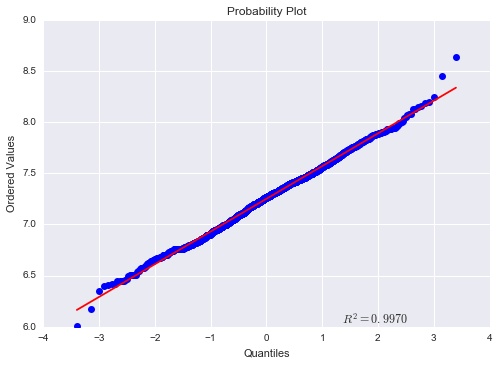

In [416]:
sns.distplot(train_df['grlivarea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['grlivarea'], plot=plt)

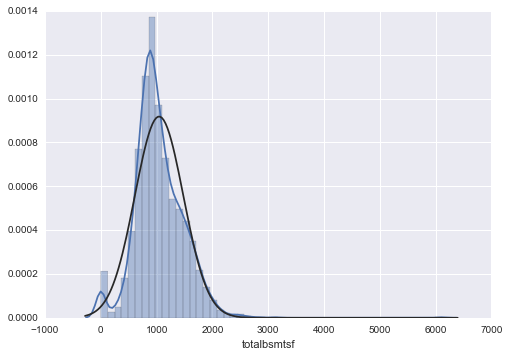

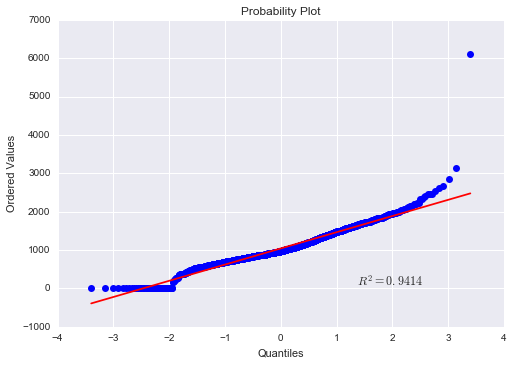

In [417]:
#histogram and normal probability plot
sns.distplot(train_df['totalbsmtsf'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['totalbsmtsf'], plot=plt)

In [418]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_df['hasbsmt'] = pd.Series(len(train_df['totalbsmtsf']), index=train_df.index)
train_df['hasbsmt'] = 0 
train_df.loc[train_df['totalbsmtsf']>0,'hasbsmt'] = 1

In [419]:
#transform data
train_df.loc[train_df['hasbsmt']==1,'totalbsmtsf'] = np.log(train_df['totalbsmtsf'])

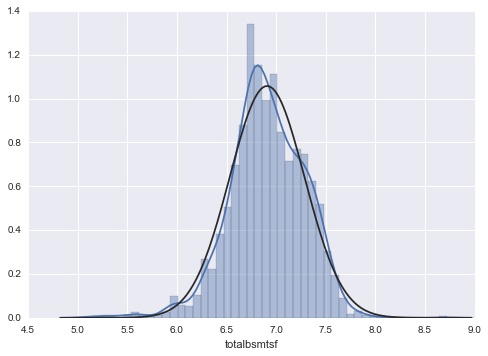

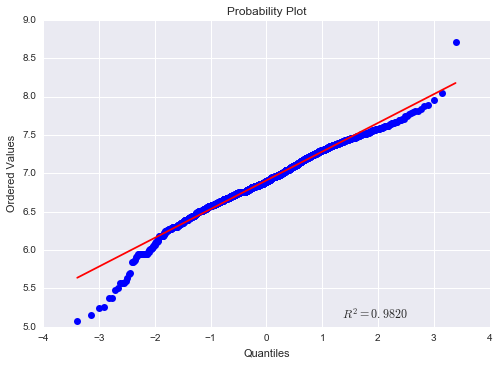

In [420]:
#histogram and normal probability plot
sns.distplot(train_df[train_df['totalbsmtsf']>0]['totalbsmtsf'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df[train_df['totalbsmtsf']>0]['totalbsmtsf'], plot=plt)

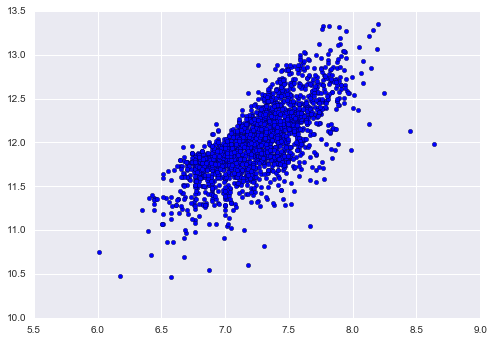

In [421]:
#scatter plot
plt.scatter(train_df['grlivarea'], train_df['saleprice']);

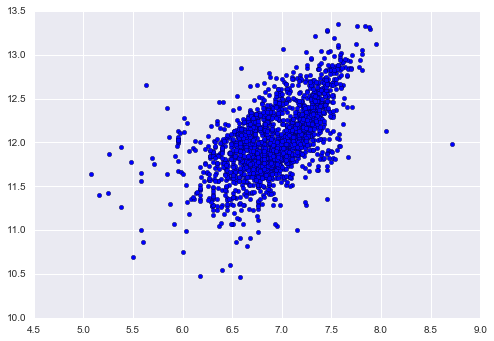

In [422]:
#scatter plot
plt.scatter(train_df[train_df['totalbsmtsf']>0]['totalbsmtsf'], train_df[train_df['totalbsmtsf']>0]['saleprice']);

In [423]:
#Replace NaN values with medians in train data
train_df=train_df.replace({'lotfrontage': {np.NaN : 50}})
train_df.head()

#Replace 0 values with medians in train data
train1=train_df 
m = np.median(train1.grlivarea[train1.grlivarea>0])
train1=train1.replace({'grlivarea': {0: m}}) 

df_2=test_df 
df_2=df_2.replace({'garagearea': {np.NaN : 50}})

In [424]:
#Run a simple model
model_1 = smf.ols(formula='saleprice ~ grlivarea' , data=train_df).fit()  
  
print (model_1.summary())
 
#dir(model) lists other print options
#Use the model to score ames_test_sfam
predictions = model_1.fittedvalues
print(test_df)
print(predictions)

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_1.predict(test_df)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_df[[0]]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)
# Commenting this out for submission to generate just one CSV file
#your_file.to_csv('ames_predictions_model_1.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2190.
Date:                Sun, 01 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:13:22   Log-Likelihood:                -273.21
No. Observations:                2036   AIC:                             550.4
Df Residuals:                    2034   BIC:                             561.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5039      0.139     39.522      0.0

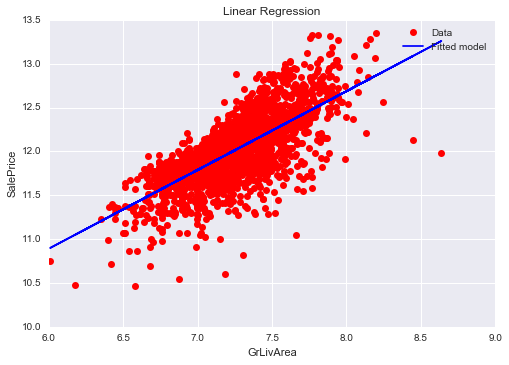

In [425]:
#Plot data and model
plt.plot(train_df['grlivarea'], train_df['saleprice'], 'ro')
plt.plot(train_df['grlivarea'], model_1.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

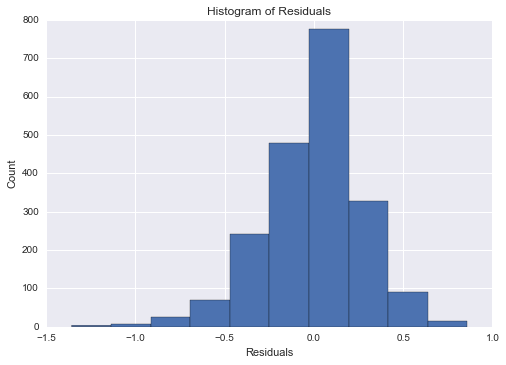

In [426]:
#Histogram of residuals
plt.hist(model_1.resid)
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

In [427]:
X_test = df_2[['yearbuilt']]

## fit a OLS model with intercept
model_2 = smf.ols(formula='saleprice ~ yearbuilt' , data=train_df).fit()  
print(model_2.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_2.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_df[[0]]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)
# Commenting this out for submission to generate just one CSV file
#your_file.to_csv('ames_predictions_model_2.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1273.
Date:                Sun, 01 Oct 2017   Prob (F-statistic):          6.05e-217
Time:                        20:13:22   Log-Likelihood:                -522.31
No. Observations:                2036   AIC:                             1049.
Df Residuals:                    2034   BIC:                             1060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9981      0.449     -8.908      0.0

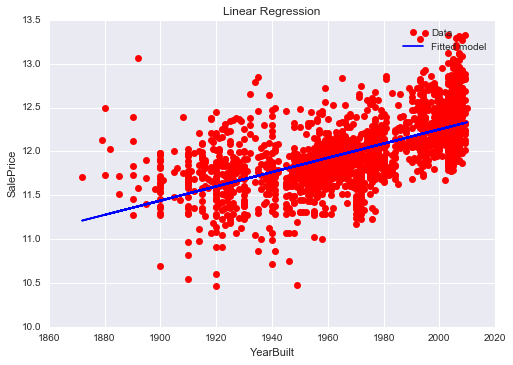

In [428]:
# Observed vs Fitted
plt.plot(train_df['yearbuilt'], train_df['saleprice'], 'ro')
plt.plot(train_df['yearbuilt'], model_2.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Linear Regression')

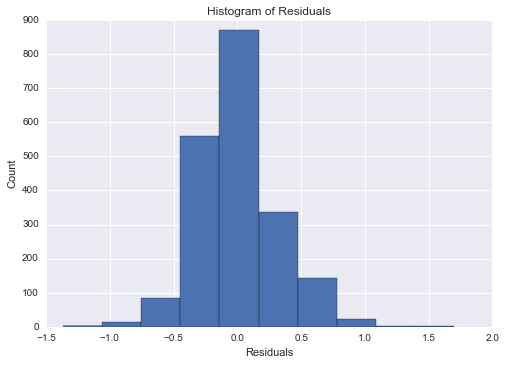

In [429]:
#Histogram of residuals
plt.hist(model_2.resid)
plt.ylabel('Count')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

In [430]:
X = train_org[['grlivarea','yearbuilt']]
y = train_org['saleprice']

X_test = df_2[['grlivarea','yearbuilt']]

## fit a OLS model with intercept
model_3 = smf.OLS(y, X).fit()

print(model_3.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_3.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_df[[0]]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Sun, 01 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:13:23   Log-Likelihood:                -25190.
No. Observations:                2039   AIC:                         5.038e+04
Df Residuals:                    2037   BIC:                         5.040e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grlivarea    108.6333      2.531     42.923      0.0

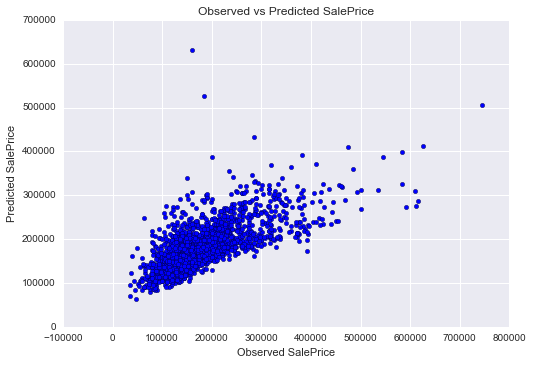

In [431]:
# Observed vs Fitted
plt.scatter(train_org['saleprice'], model_3.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

In [432]:
X = train_org[['grlivarea', 'yearbuilt', 'overallqual', 'totalbsmtsf', 'garagearea']]
y = train_org['saleprice']

X_test = df_2[['grlivarea', 'yearbuilt', 'overallqual', 'totalbsmtsf', 'garagearea']]

## fit a OLS model with intercept
model_4 = smf.OLS(y, X).fit()

print(model_4.summary())

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model_4.predict(X_test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test_df[[0]]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)
your_file.to_csv('ames_predictions.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Sun, 01 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:13:23   Log-Likelihood:                -24361.
No. Observations:                2039   AIC:                         4.873e+04
Df Residuals:                    2034   BIC:                         4.876e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
grlivarea      45.4203      2.101     21.619      

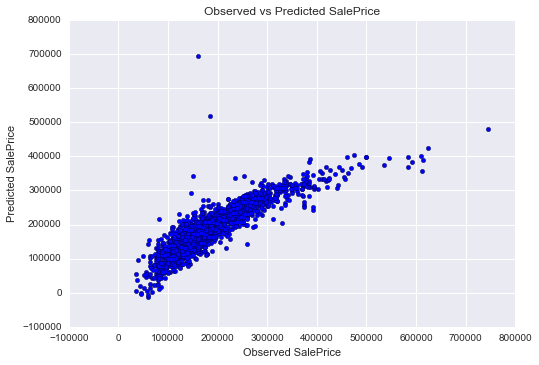

In [433]:
# Observed vs Fitted
plt.scatter(train_org['saleprice'], model_4.fittedvalues)
plt.ylabel('Predicted SalePrice')
plt.xlabel('Observed SalePrice')
plt.title('Observed vs Predicted SalePrice')

In [434]:
model_4.params

grlivarea         45.420312
yearbuilt        -52.710160
overallqual    24869.822809
totalbsmtsf       33.632031
garagearea        63.292645
dtype: float64